<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥DIALOGUE-GPT (CODE)🔥 </div>

![](https://miro.medium.com/v2/resize:fit:1400/1*w2wbUOqJeeMWACWa7pDHkg.jpeg)

Dialogue GPT, or Generative Pre-trained Transformer for Dialogue Generation, is a variant of the GPT architecture specifically tailored for generating conversational responses. It builds upon the success of models like GPT-2 and GPT-3 but focuses on improving the generation of coherent and contextually relevant dialogue.

Here are some key points about Dialogue GPT:

1. **Pre-training**: Like other GPT models, Dialogue GPT is pre-trained on vast amounts of text data using unsupervised learning objectives such as language modeling. This pre-training enables the model to learn rich representations of language and context.

2. **Fine-tuning for Dialogue**: After pre-training, the model is fine-tuned on dialogue-specific datasets to enhance its ability to generate contextually appropriate responses in conversational settings. Fine-tuning allows the model to adapt to the nuances of dialogue, including turn-taking, topic transitions, and maintaining coherence over extended interactions.

3. **Context-aware Generation**: Dialogue GPT excels at generating responses that take into account the context provided by preceding dialogue turns. By leveraging the context, the model can produce more relevant and engaging responses that align with the ongoing conversation.

4. **Evaluation Metrics**: Evaluation of dialogue generation models like Dialogue GPT often involves metrics such as perplexity, BLEU score, and human evaluation. Perplexity measures the model's uncertainty in predicting the next token in a sequence, while BLEU score assesses the similarity between generated responses and human-written references.

5. **Applications**: Dialogue GPT has numerous applications across various domains, including chatbots, virtual assistants, customer service automation, and interactive storytelling. It can be deployed in environments where natural, human-like conversation is desired to enhance user experience and engagement.

6. **Challenges**: Despite its capabilities, Dialogue GPT faces challenges such as maintaining coherence over long conversations, avoiding repetitive or generic responses, and handling sensitive or inappropriate content. Researchers continue to explore techniques to address these challenges and improve the performance of dialogue generation models.

Overall, Dialogue GPT represents a significant advancement in natural language understanding and generation, enabling more sophisticated and contextually aware dialogue systems. As research in this area progresses, we can expect further refinements and innovations in generating human-like conversational interactions.

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📂INSTALLING DEPENDENCIES AND IMPORING LIBRARIES📂 </div>

In [1]:
!pip install datasets

In [22]:
import warnings
warnings.filterwarnings("ignore", message="Was asked to gather along dimension 0")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜READING THE DIALOGUES DATA📜 </div>


In [3]:
# Step 1: Read your dataset
file_path = '/kaggle/input/dialogue-dataset/dialogs.txt'  # Replace with your dataset path
data = pd.read_csv(file_path, sep='\t', header=None, names=['input', 'response'])

In [4]:
# Step 2: Convert to HuggingFace Dataset format
dataset = Dataset.from_pandas(data)

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜DIALOGUE-GPT (TOKENIZER)📜 </div>

In [5]:
# Step 3: Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-small")

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [6]:
# Add padding token if it's not already present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Tokenize the dataset
def tokenize_function(examples):
    model_inputs = tokenizer(examples['input'], max_length=128, truncation=True, padding="max_length")
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['response'], max_length=128, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [7]:
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/3725 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3935: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜TRAIN-TEST-SPLIT📜 </div>


In [8]:
# Step 5: Split the dataset
train_test_split = tokenized_dataset.train_test_split(test_size=0.1)
train_dataset = train_test_split['train']
valid_dataset = train_test_split['test']

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜DIALOGUE-GPT (PRE-TRAINED)📜 </div>

![](https://huggingface.co/front/thumbnails/dialogpt.png)

In [9]:
# Step 6: Load the pre-trained DialoGPT model
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-small")

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [10]:
model.resize_token_embeddings(len(tokenizer))

Embedding(50258, 768)

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜MODEL TRAINING📜 </div>

In [12]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10, 
    report_to="wandb",  
    save_total_limit=2,
    logging_first_step=True,    
    metric_for_best_model="eval_loss",  
)

In [13]:
# Step 8: Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [14]:
# Step 9: Train the model
trainer.train()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.424400,0.409704
2,0.461600,0.421290
3,0.439800,0.412112
4,0.352900,0.414679
5,0.401600,0.407522


TrainOutput(global_step=4190, training_loss=1.1709654647012315, metrics={'train_runtime': 1040.4379, 'train_samples_per_second': 16.109, 'train_steps_per_second': 4.027, 'total_flos': 1094813614080000.0, 'train_loss': 1.1709654647012315, 'epoch': 5.0})

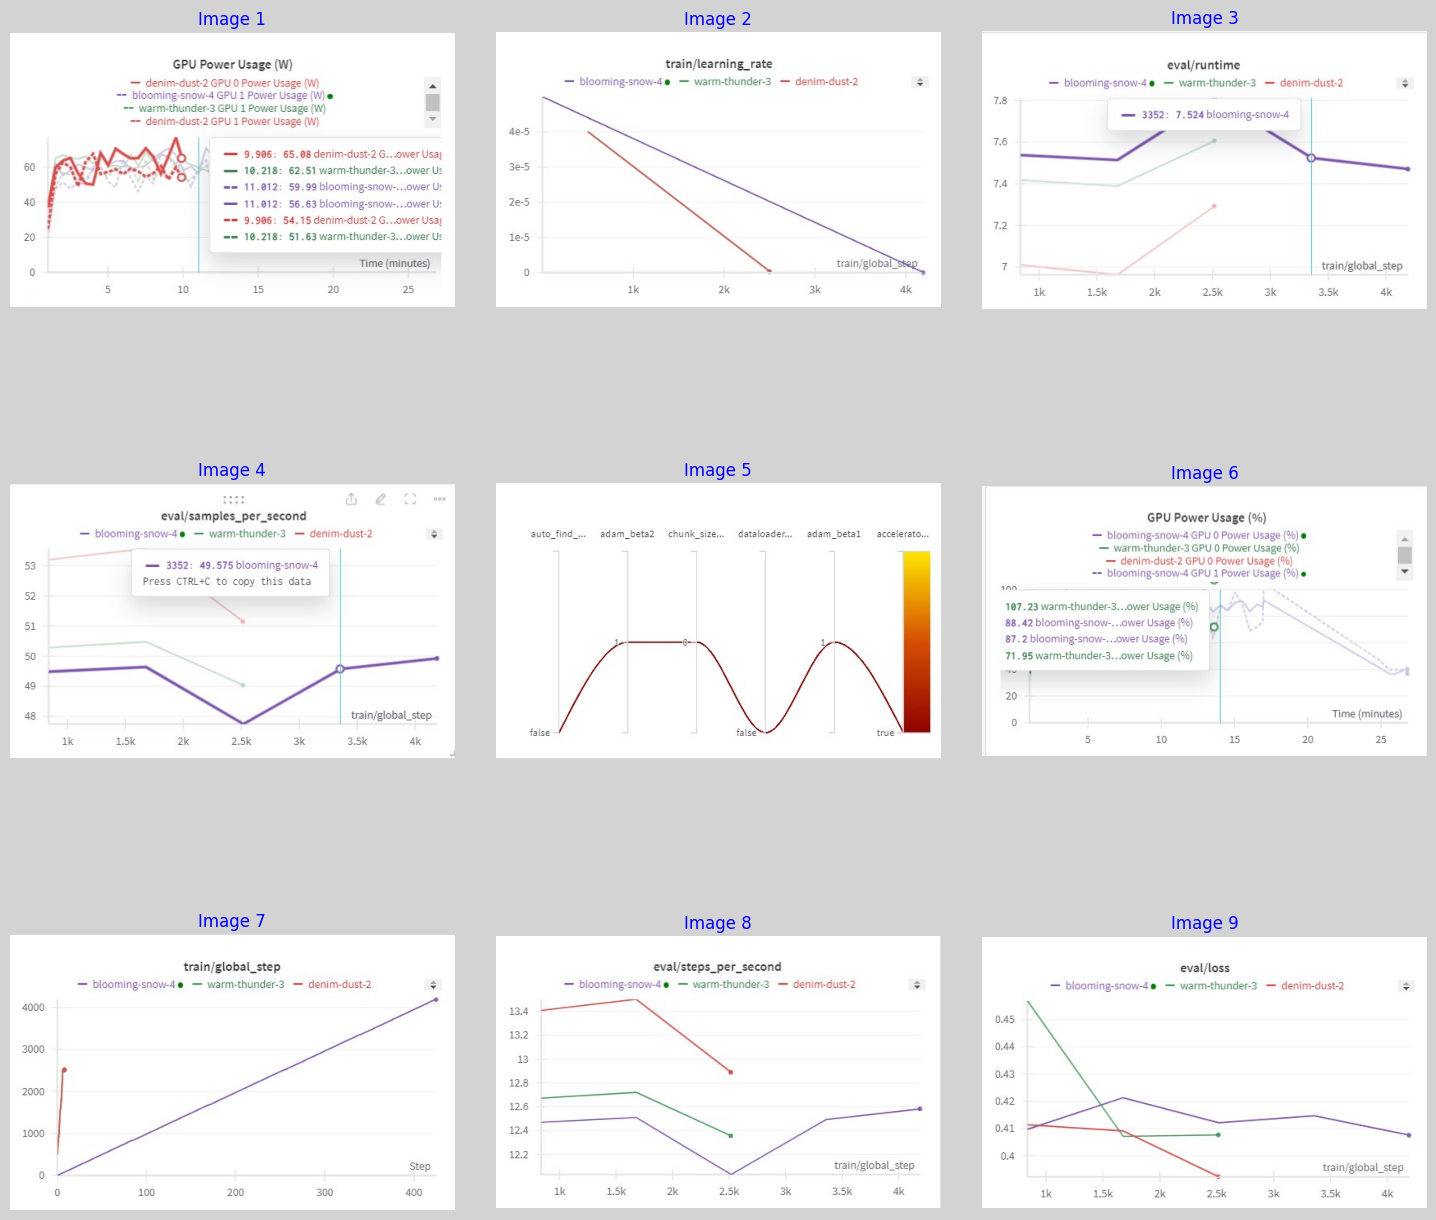

In [24]:
import os

# Path to the directory containing your images
directory = "/kaggle/input/training-graphs"

# Get the list of all image files in the directory
image_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Display images in three rows
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Loop through each image path and display it in a subplot
for i, path in enumerate(image_files):
    # Load the image
    img = mpimg.imread(path)
    # Determine subplot position
    row = i // 3
    col = i % 3
    # Display the image
    axs[row, col].imshow(img)
    axs[row, col].axis('off')  # Turn off axis
    axs[row, col].set_title(f"Image {i+1}", fontsize=12, color='blue')  # Set title properties

# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Set background color
fig.patch.set_facecolor('lightgray')

plt.show()

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜SAVING THE MODEL📜 </div>


In [15]:
# Save the model
model.save_pretrained("/kaggle/working/")
tokenizer.save_pretrained("/kaggle/working/")

('/kaggle/working/tokenizer_config.json',
 '/kaggle/working/special_tokens_map.json',
 '/kaggle/working/vocab.json',
 '/kaggle/working/merges.txt',
 '/kaggle/working/added_tokens.json',
 '/kaggle/working/tokenizer.json')

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜MODEL PREDICTION📜 </div>

In [21]:
"""device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def generate_response(input_text, max_length=100):
    # Tokenize the input text
    input_ids = tokenizer.encode(input_text, return_tensors="pt").to(device)

    # Generate response
    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1)

    # Decode the generated response
    response = tokenizer.decode(output[0], skip_special_tokens=True)

    return response

# Example usage
input_prompt = "Hii"
response = generate_response(input_prompt)
print("Generated response:", response)"""

'device = torch.device("cuda" if torch.cuda.is_available() else "cpu")\nmodel.to(device)\n\ndef generate_response(input_text, max_length=100):\n    # Tokenize the input text\n    input_ids = tokenizer.encode(input_text, return_tensors="pt").to(device)\n\n    # Generate response\n    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1)\n\n    # Decode the generated response\n    response = tokenizer.decode(output[0], skip_special_tokens=True)\n\n    return response\n\n# Example usage\ninput_prompt = "Hii"\nresponse = generate_response(input_prompt)\nprint("Generated response:", response)'

![](https://static.fontget.com/t/h/thank-you/preview@2x.png)